<a href="https://colab.research.google.com/github/ABISHEKEKUMAR/IMARTICUS-ML-2-28-05-2022/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_csv("/content/credit_card.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [90]:
#Q1. What does the primary analysis of several categorical features reveal?

In [ ]:
The given data set has one categorical variable which is customer id this is used to find the person who are all having the credit card

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [92]:
data.shape

(8950, 18)

In [93]:
ab= data.drop("CUST_ID",axis=1)

In [94]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [95]:
ab.shape

(8950, 17)

In [ ]:
#Q2. Perform the following Exploratory Data Analysis tasks: a. Missing Value Analysis b. Outlier Treatment using the Z-score method c. Deal with correlated variables

In [96]:
ab.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [97]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [98]:
ab.fillna(ab["CREDIT_LIMIT"].mean(),inplace=True)
ab.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [99]:
ab.fillna(ab["MINIMUM_PAYMENTS"].mean(),inplace = True)
ab.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [100]:
ab.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [101]:
x=ab.drop(['TENURE'],axis=1)
y=ab["TENURE"]

{'boxes': [<matplotlib.lines.Line2D at 0x7f2a2ff0c890>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f2a2ff10890>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2a2ff178d0>,
  ...],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2a2ff17390>,
  ...],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2a2ff0cdd0>,
  ...]}

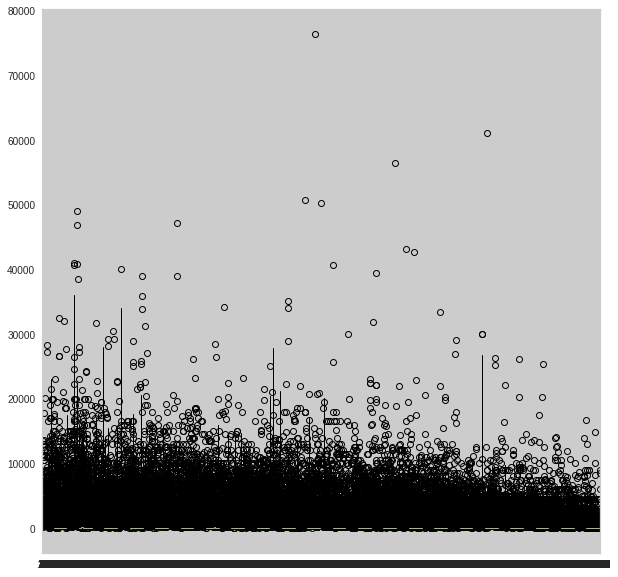

In [104]:
plt.figure(figsize=(10,10))
plt.boxplot(ab)

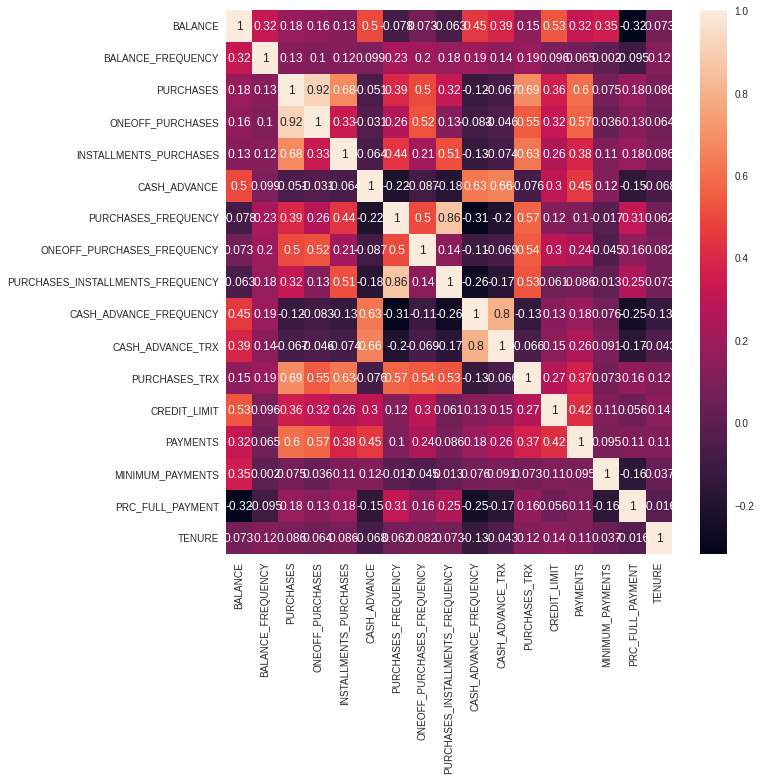

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(ab.corr(),annot=True)

<Figure size 1440x1440 with 0 Axes>

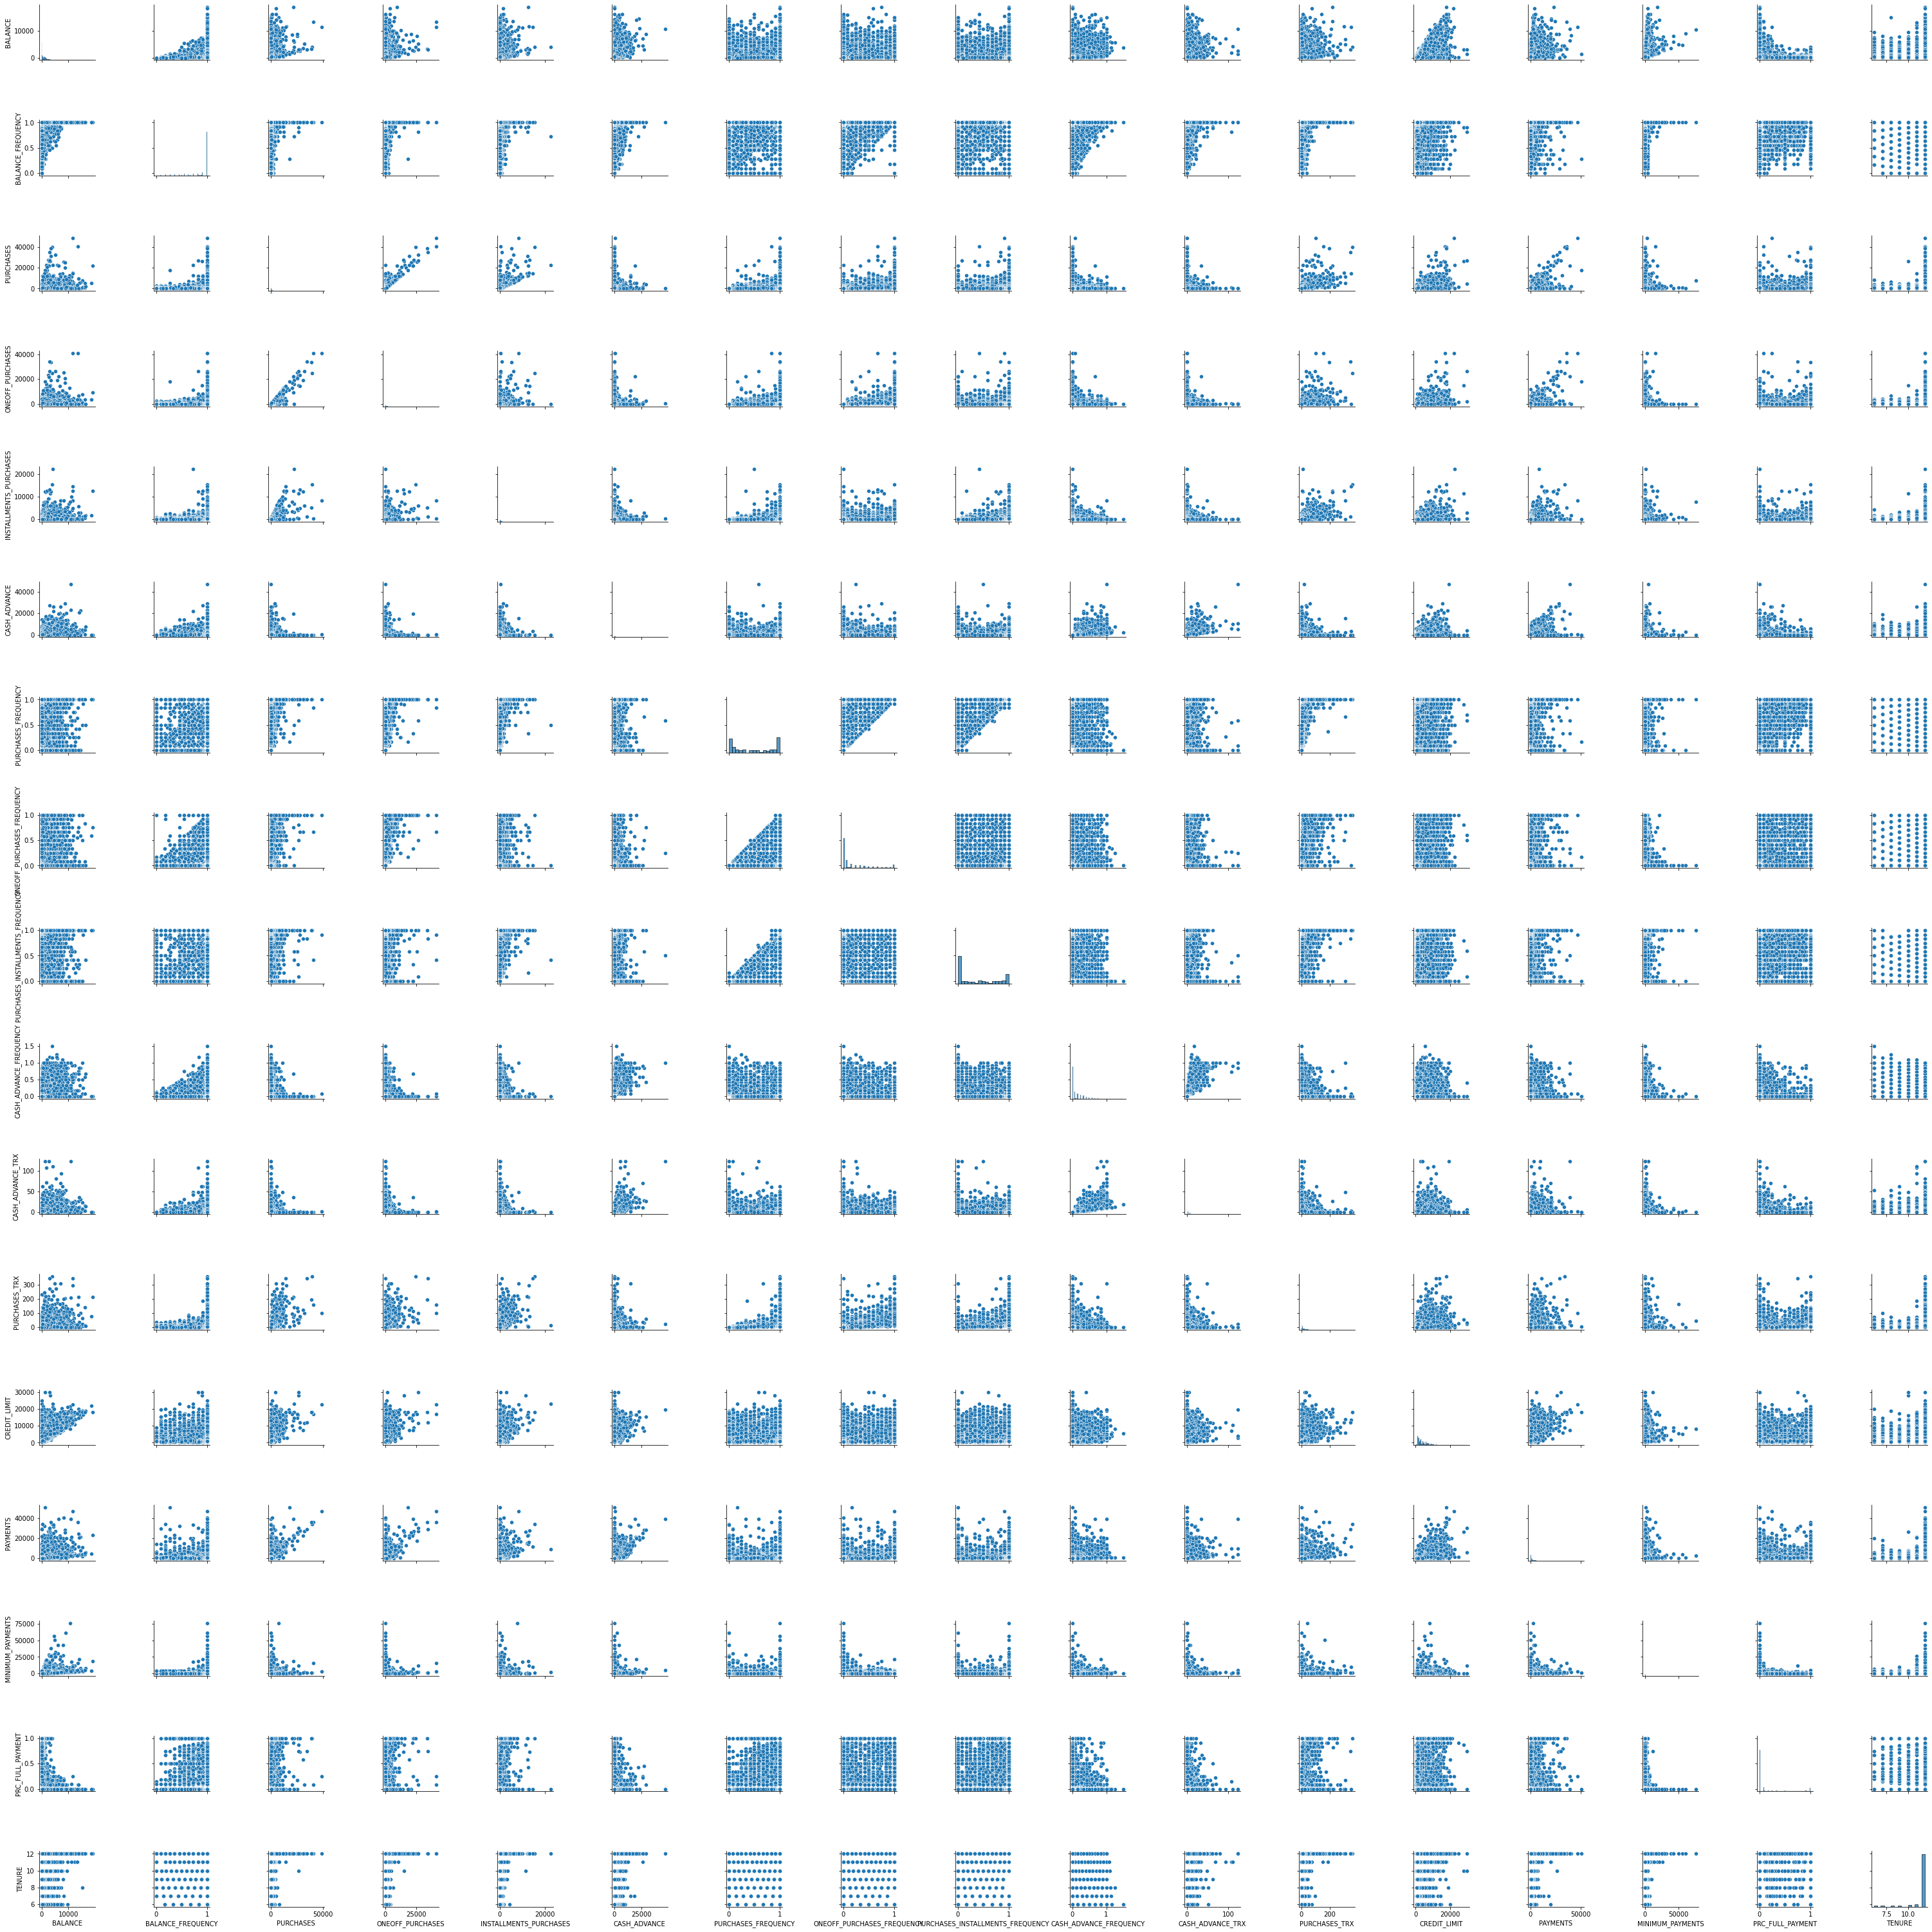

In [73]:
plt.figure(figsize=(20,20))
sns.pairplot(ab)

In [74]:
#Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
k_pca=pca.fit_transform(ab)
print(k_pca)

[[-4.33989620e+03  9.61331756e+02  7.60935215e+01 -2.58636321e+02
   1.06371483e+01]
 [ 4.10457569e+03 -2.38259445e+03  1.51290044e+03 -4.35207871e+03
   1.91757863e+02]
 [ 1.48947320e+03 -1.88879633e+03 -2.13375623e+03  1.23031061e+03
  -3.69545730e+02]
 ...
 [-4.39230887e+03  9.55293129e+02 -3.15787295e+00 -2.22037378e+02
  -5.17036386e+01]
 [-4.80465040e+03  1.06991980e+03  2.28781855e+02 -3.94936723e+02
  -1.42033722e+02]
 [-3.63550356e+03  1.58947564e+03 -2.58652104e+01  2.43037811e+02
  -8.34780222e+02]]


In [77]:
#Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

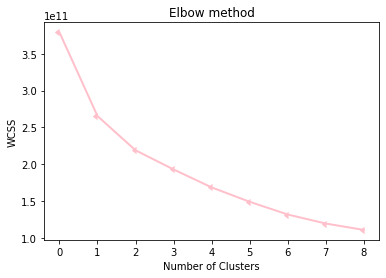

In [76]:
from sklearn.cluster import KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=43).fit(k_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(innertia,linewidth=2,color="pink",marker=8)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
#Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [105]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(k_pca)
score = silhouette_score(k_pca, kmeans.labels_,metric='euclidean')

In [106]:
print("Silhouette score:",score)

Silhouette score: 0.466403379746535


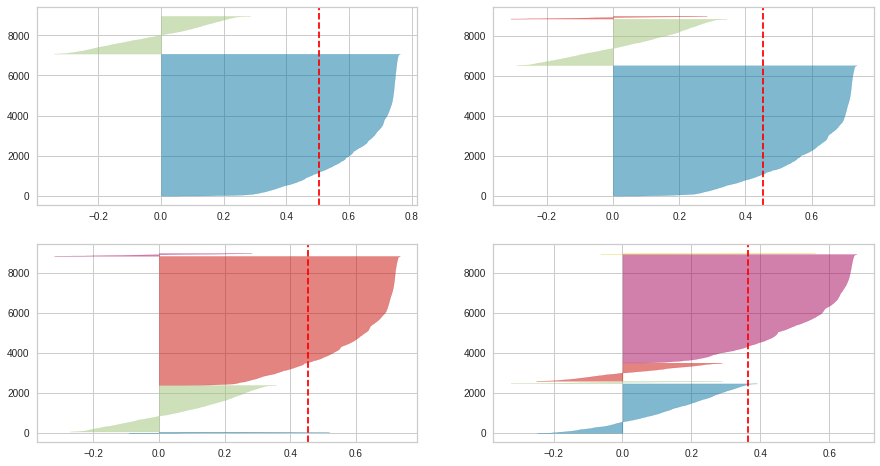

In [83]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=100, 
                random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(x)